In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data_path = "data/Mathurance Hackathon/Base de Données MATHURANCE.xlsm"

def xlsm_to_csv(path):
    data = pd.read_excel(path)
    data.to_csv("data/data.csv")

xlsm_to_csv(data_path)



In [5]:
data = pd.read_excel(data_path)
data.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,3.058432e+09
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,2.972783e+09
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,2.611499e+09
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,2.547476e+09
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,2.057632e+09


In [6]:
print(data.isnull().sum())

Exercice               0
Branche                0
Code Produit           0
Désignation Produit    0
Sous-Branche           0
Date Survenance        0
Règlement              0
dtype: int64


In [7]:
data['Year Survenance'] = pd.to_datetime(data['Date Survenance'], format='%d/%m/%Y').dt.year
data["Delay"] = data["Exercice "] - data["Year Survenance"]
data.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement,Year Survenance,Delay
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,3.058432e+09,2019,2
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,2.972783e+09,2017,1
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,2.611499e+09,2017,2
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,2.547476e+09,2015,1
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,2.057632e+09,2021,1


In [30]:
for column in data.columns.drop("Règlement", "Date Survenance"):
    unique_values = data[column].unique()
    print(f"there are {len(unique_values)} in '{column}':")
    print(unique_values)
    print("\n")

there are 10 in 'Exercice ':
[2021 2018 2019 2016 2022 2023 2015 2017 2020 2014]


there are 1 in 'Branche':
['Risques Industriels']


there are 17 in 'Code Produit':
['IN' 'RG' 'PE' 'IM' 'MH' 'VM' 'RN' 'IS' 'MP' 'BG' 'MI' 'DE' 'RP' 'VC'
 'CN' 'RR' 'CM']


there are 17 in 'Désignation Produit':
['Incendie Risques Annexes ' 'RC Générale  ' "Perte D'exploitation  "
 'Incendie Risques Multisites' 'Multirisques Habitation  '
 'Vol De Marchandise  ' 'Responsabilité Civile Association  '
 'Incendie Risques Simples  ' 'Multirisques Professionnelles  '
 'Bris De Glaces ' 'Multirisques Immeubles  ' 'Dégâts Des Eaux '
 'RC Professionnelle  ' 'Vol En Coffre  ' 'Catastrophes Naturelles'
 'Produits Livrés  ' 'Catastrophes Naturelles Multiples']


there are 4 in 'Sous-Branche':
['Incendie' 'Responsabilité Civile' 'Risque simple' 'CAT-NAT']


there are 5324 in 'Date Survenance':
['14/10/2019' '14/03/2017' '17/06/2017' ... '28/08/2006' '09/02/2010'
 '05/08/2009']


there are 25 in 'Year Survenance':
[

# Data visualization

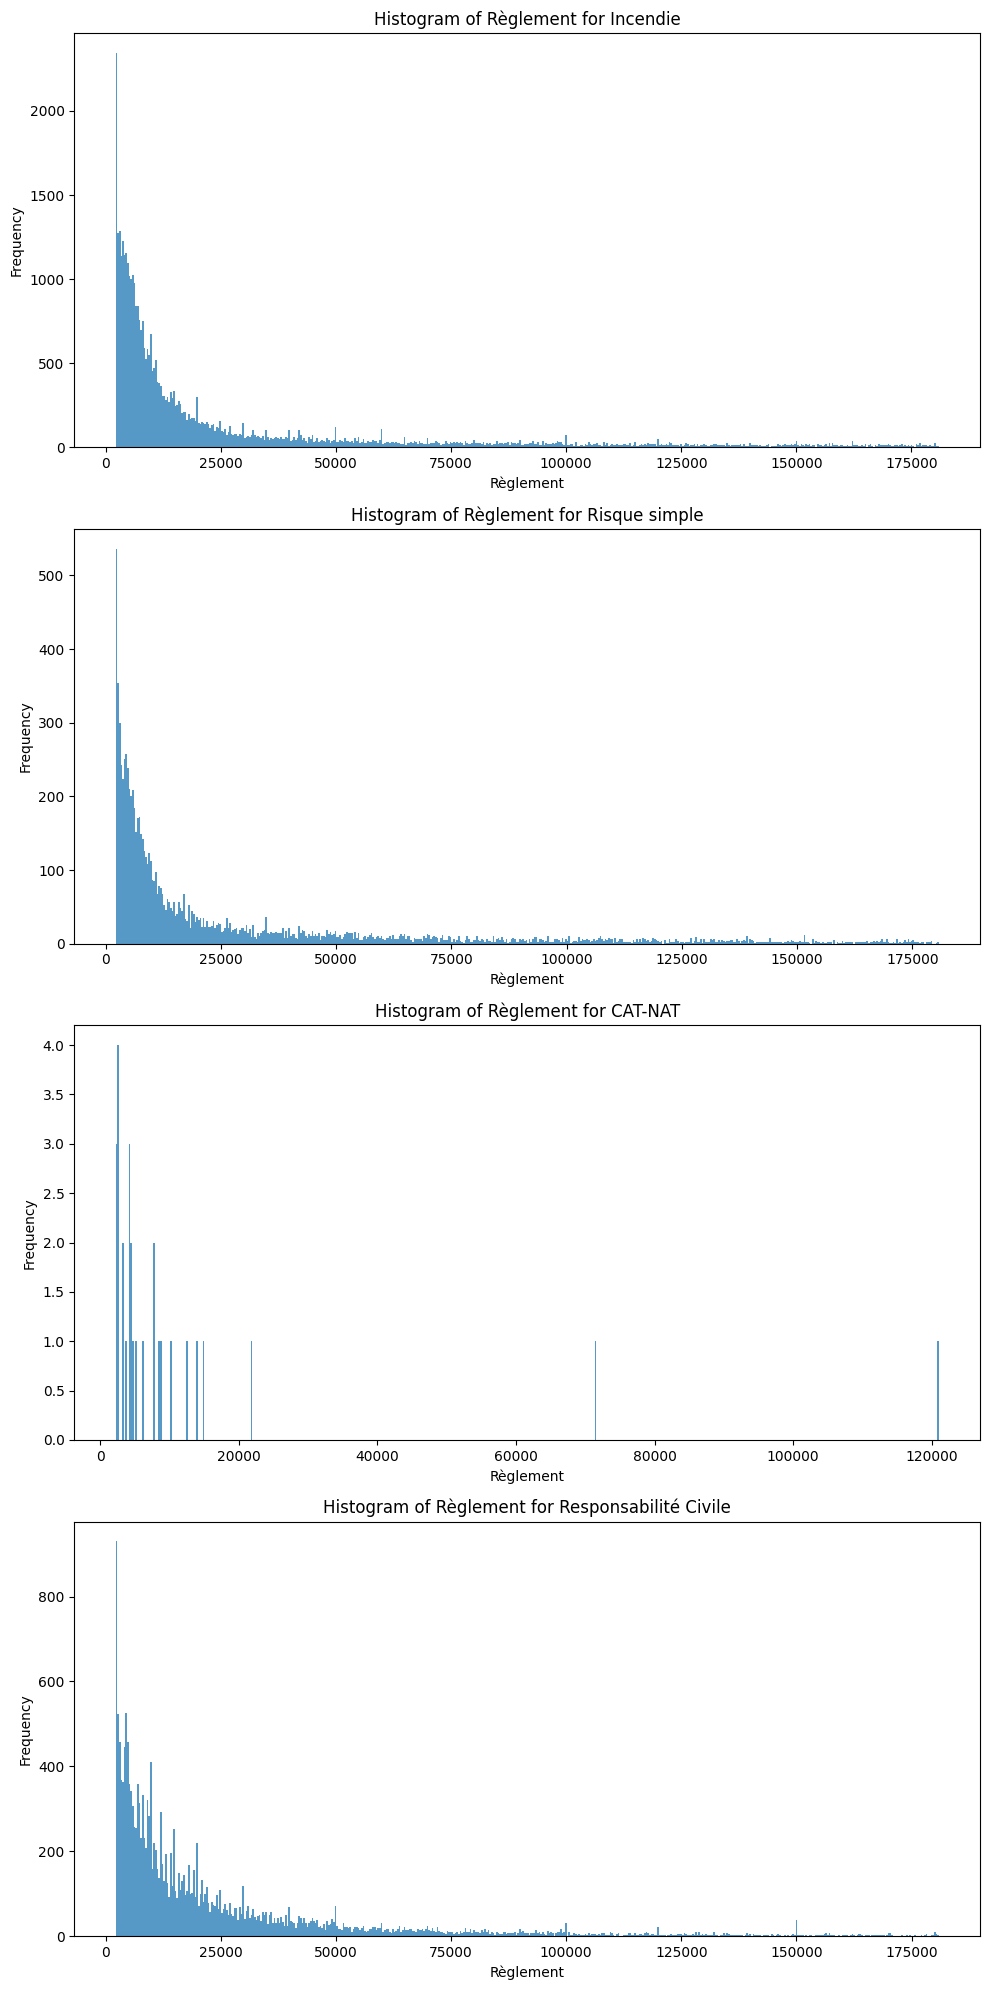

In [ ]:
quantile_10 = data['Règlement'].quantile(0.1)
filtered_data = data.query("Règlement > @quantile_10 and Règlement<@data['Règlement'].quantile(0.9)")
sous_branches = filtered_data['Sous-Branche'].unique()
fig, axes = plt.subplots(nrows=len(sous_branches), ncols=1, figsize=(10, 5 * len(sous_branches)))

for ax, sous_branche in zip(axes, sous_branches):
    subset = filtered_data[filtered_data['Sous-Branche'] == sous_branche]
    ax.hist(subset['Règlement'], bins=500, alpha=0.75)
    ax.set_title(f'Histogram of Règlement for {sous_branche}')
    ax.set_xlabel('Règlement')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()